In [1]:
import numpy as np # linear algebra
import pandas as pd # 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
full = pd.read_csv('Documents\FullDBFrank.csv', delimiter=';')
#This file contains the information of the DB without the comments of the causes 
full.head()

,Project,FY,Quarter,Month,Main Category,Category_details,Main_Causes,Causes_details,Amount,Comments,Root_causes
0,ALNG,2010,Q3,August,Operations,Installations,PLANNING,1.2 Late delivery from suppliers/subcontractors,313.0,Change of Survey Vessel Pacific Lance vs. Nyanga,NaN
1,ALNG,2010,Q3,June,Operations,Installations,PLANNING,1.4 Ship Rescheduling/Reallocation : Change of...,1670.0,Addl Post Trenching Mob° cost,NaN
2,ALNG,2010,Q2,May,Operations,Installations,PLANNING,1.4 Ship Rescheduling/Reallocation : Change of...,1636.0,Commissioning Operations Hawk vs. Legend,NaN
3,Block 15,2010,Q1,February,Project Management,Project Management,PLANNING,1.1 Late issue of AFC documentation,600.0,NaN,NaN
4,Block 15,2010,Q1,December,Fabrication,Fabrication,PLANNING,1.1 Late issue of AFC documentation,100.0,NaN,NaN


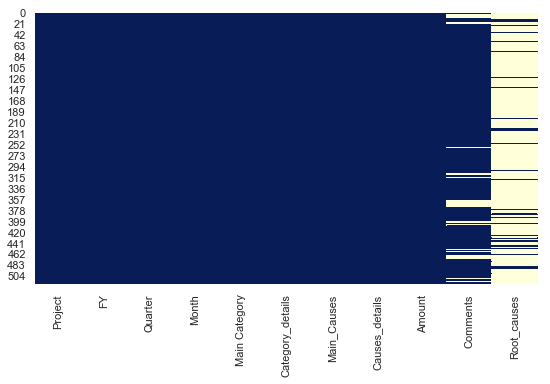

In [3]:
#Check for the missing values in the columns 
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(full.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In this example, I drop the columns with missing values:
- The Root Causes have too many missing values so it is not really important.
- The Comments column could be included in a NLP analysis, that is outside of the scope of this kernel


In [4]:
train = full.drop(columns = ["Comments","Root_causes"])
#This file contains the information of the DB without the comments of the causes 
train.head()

,Project,FY,Quarter,Month,Main Category,Category_details,Main_Causes,Causes_details,Amount
0,ALNG,2010,Q3,August,Operations,Installations,PLANNING,1.2 Late delivery from suppliers/subcontractors,313.0
1,ALNG,2010,Q3,June,Operations,Installations,PLANNING,1.4 Ship Rescheduling/Reallocation : Change of...,1670.0
2,ALNG,2010,Q2,May,Operations,Installations,PLANNING,1.4 Ship Rescheduling/Reallocation : Change of...,1636.0
3,Block 15,2010,Q1,February,Project Management,Project Management,PLANNING,1.1 Late issue of AFC documentation,600.0
4,Block 15,2010,Q1,December,Fabrication,Fabrication,PLANNING,1.1 Late issue of AFC documentation,100.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 9 columns):
Project             521 non-null object
FY                  521 non-null int64
Quarter             521 non-null object
Month               521 non-null object
Main Category       521 non-null object
Category_details    521 non-null object
Main_Causes         521 non-null object
Causes_details      521 non-null object
Amount              521 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 36.7+ KB


In [6]:
#train['Amount'] = train['Amount'].astype('float64') 

In [7]:
train[["Project", "Amount"]].groupby(['Project'], as_index=False).sum().sort_values(by='Amount', ascending=False)

,Project,Amount
1,Block 15,49238.500000
9,Pazflor,31412.100003
7,Moho Bilondo,24338.340000
0,ALNG,18401.000003
2,Block 17,13906.000000
10,Saxi,4684.000000
4,Epc2b,3088.000000
5,Greater Plutonio,1779.000000
3,EGP3B,500.000000
8,Oso,500.000000


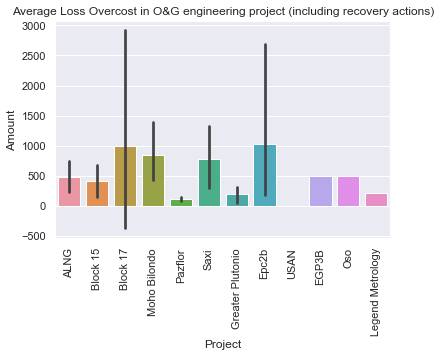

In [8]:
#The next grpah shows the mean 
sns.barplot(x='Project', y='Amount', data=train)
plt.ylabel("Amount")
plt.title("Average Loss Overcost in O&G engineering project (including recovery actions)")
plt.xticks(rotation=90)
plt.show()

The table and the graph shows that USAN project doesnt have any positive or negative impact data, so I will drop this project.
The projects Block17 and EPC2B have great variance. And the Pazflor project should have a great amount of overcost, however the graphs shows a small amount.

This mean that the data have positive and negative values for all the project.
The positive values are the overcost caused by the Project management problems. 
The negative values are the actions taken to correct those values 

In [9]:
overcost = train[train.Amount > 0]

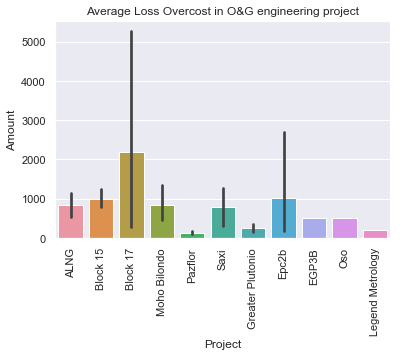

In [10]:
sns.barplot(x='Project', y='Amount', data=overcost)
plt.ylabel("Amount")
plt.title("Average Loss Overcost in O&G engineering project")
plt.xticks(rotation=90)
plt.show()

In [11]:
#Now we check again the total amount loss due to PM problems, without the corrective actions
overcost[["Project", "Amount"]].groupby(['Project'], as_index=False).sum().sort_values(by='Amount', ascending=False)

,Project,Amount
1,Block 15,85255.000000
9,Pazflor,34990.100003
7,Moho Bilondo,24338.340000
0,ALNG,21541.000003
2,Block 17,17506.000000
10,Saxi,4684.000000
4,Epc2b,3088.000000
5,Greater Plutonio,2037.000000
3,EGP3B,500.000000
8,Oso,500.000000


In [12]:
# Delete the rows of the proejcts EGP3B, Oso, Legend Metrology
overcost.drop(overcost[overcost['Project'] == ("EGP3B")].index, inplace=True)
overcost.drop(overcost[overcost['Project'] == ("Oso")].index , inplace=True)
overcost.drop(overcost[overcost['Project'] == ("Legend Metrology")].index , inplace=True)

d:\Profiles\fesanchez\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


We see that the there are only positive values and USAN project is out

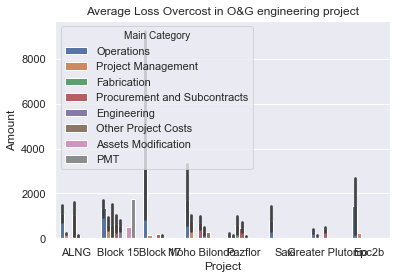

In [13]:
sns.barplot(x='Project', y='Amount', hue="Main Category", data=overcost)
sns.set(rc={'figure.figsize':(19,8.27)})
plt.ylabel("Amount")
plt.title("Average Loss Overcost in O&G engineering project")
plt.show()

In [14]:
overcost.groupby(['Project']).Amount.sum()

Project
ALNG                21541.000003
Block 15            85255.000000
Block 17            17506.000000
Epc2b                3088.000000
Greater Plutonio     2037.000000
Moho Bilondo        24338.340000
Pazflor             34990.100003
Saxi                 4684.000000
Name: Amount, dtype: float64

In [15]:
#Normalize results
normalized= overcost.copy()

In [16]:
normalized.loc[normalized.Project == 'ALNG', 'Amount'] = 100*overcost.loc[overcost.Project == 'ALNG', 'Amount']/21541
normalized.loc[normalized.Project == 'Block 15', 'Amount'] = 100*overcost.loc[overcost.Project == 'Block 15', 'Amount']/85255
normalized.loc[normalized.Project == 'Block 17', 'Amount'] = 100*overcost.loc[overcost.Project == 'Block 17', 'Amount']/17506
normalized.loc[normalized.Project == 'Epc2b', 'Amount'] = 100*overcost.loc[overcost.Project == 'Epc2b', 'Amount']/3088
normalized.loc[normalized.Project == 'Greater Plutonio', 'Amount'] = 100*overcost.loc[overcost.Project == 'Greater Plutonio', 'Amount']/2037
normalized.loc[normalized.Project == 'Moho Bilondo', 'Amount'] = 100*overcost.loc[overcost.Project == 'Moho Bilondo', 'Amount']/24338.34
normalized.loc[normalized.Project == 'Pazflor', 'Amount'] = 100*overcost.loc[overcost.Project == 'Pazflor', 'Amount']/34990.099999
normalized.loc[normalized.Project == 'Saxi', 'Amount'] = 100*overcost.loc[overcost.Project == 'Saxi', 'Amount']/4684

In [17]:
normalized.groupby(['Project']).Amount.sum()

Project
ALNG                100.0
Block 15            100.0
Block 17            100.0
Epc2b               100.0
Greater Plutonio    100.0
Moho Bilondo        100.0
Pazflor             100.0
Saxi                100.0
Name: Amount, dtype: float64

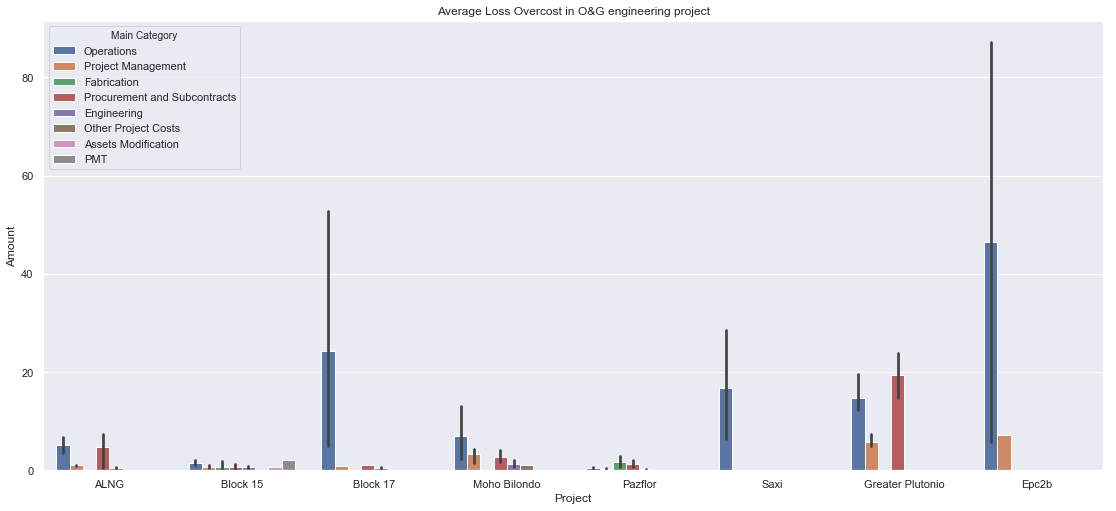

In [18]:
#high_overcost = overcost[overcost["Amount"] > 10]
sns.barplot(x='Project', y='Amount', hue="Main Category", data=normalized)
sns.set(rc={'figure.figsize':(17.7,8.27)})
plt.ylabel("Amount")
plt.title("Average Loss Overcost in O&G engineering project")
plt.show()

The graphic is better but there are some outliers that could pollute the analysis

In [19]:
#Look for outliers , thresshold in 50
# df.loc[<row selection>, <column selection>]
out1 = normalized.loc[normalized.Amount > 30, :].sort_values(by=['Amount'], ascending=False)
out1

,Project,FY,Quarter,Month,Main Category,Category_details,Main_Causes,Causes_details,Amount
236,Epc2b,2008,Q3,August,Operations,Hookup & Commissioning,COMMERCIAL/CONTRACTUAL,2.4 Incorrect estimate of allowances/contingen...,87.176166
436,Block 17,2010,Q3,August,Operations,Installation,PERFORMANCE ERRORS OR INEFFICIENCIES,4.5 Incorrect execution offshore by Acergy,67.222667
67,Saxi,2008,Q2,March,Operations,Installations,PLANNING,1.4 Ship Rescheduling/Reallocation : Change of...,43.701964


In [20]:
normalized.drop(normalized[normalized['Amount'] > 30].index, inplace=True)

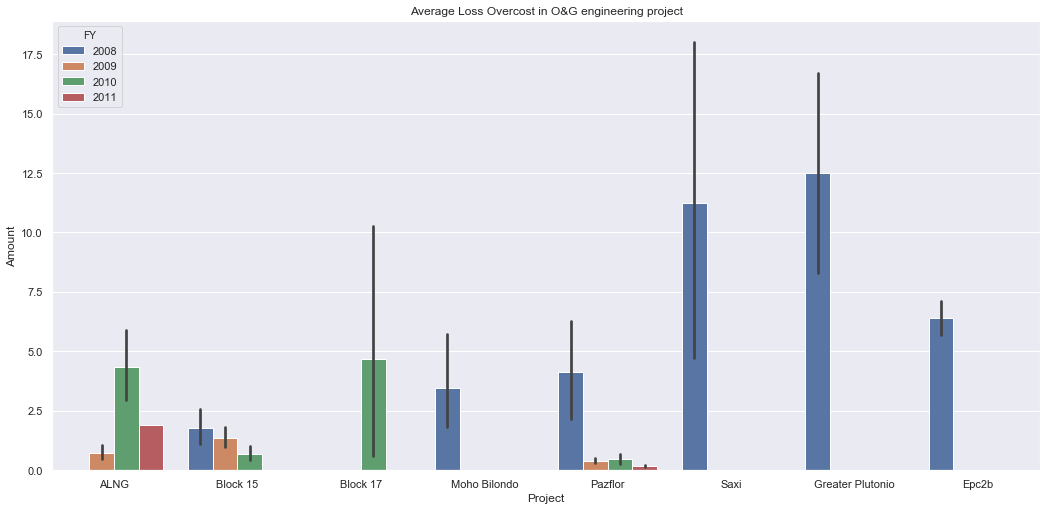

In [21]:
#high_overcost = overcost[overcost["Amount"] > 10]
sns.barplot(x='Project', y='Amount', hue="FY", data=normalized)
sns.set(rc={'figure.figsize':(17.7,8.27)})
plt.ylabel("Amount")
plt.title("Average Loss Overcost in O&G engineering project")
plt.show()

Now is time to introduce the time and the cause details as flaot in order to do some extra calculation

In [22]:
#Chaning the months to numbers 
mapping = {'January': 1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June': 6, 'July': 7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
normalized['MonthN']=normalized.Month.map(mapping)
normalized.columns

Index(['Project', 'FY', 'Quarter', 'Month', 'Main Category',
       'Category_details', 'Main_Causes', 'Causes_details', 'Amount',
       'MonthN'],
      dtype='object')

In [23]:
#Chaning the causes to numbers 
mapping2 = {'1.2 Late delivery from suppliers/subcontractors': 1,
'1.4 Ship Rescheduling/Reallocation : Change of vessel ' : 2,
'1.1 Late issue of AFC documentation':3,
'1.3 Late availability of ships extra costs':4,
'2.1 Incorrect estimate of cost in tender':5,
'2.2 Improper White Book Rates / Escalations':6,
'2.4 Incorrect estimate of allowances/contingencies':7,
'2.5 Improper Contract/Subcontract Flowdown':8,
'3.1 Materials and equipment delivered out-of specs':9,
'3.2 Incomplete or partial delivery':10,
'4.1 Incorrect design engineering':11,
'4.2 Incorrect installation engineering':12,
'4.3 Extra costs/staff cause by final docs delay':13,
'4.5 Incorrect execution offshore by Acergy':14,
'4.6 Incorrect execution offshore by 3rd party':15,
'4.7 Incorrect onshore local logistic':16,
'5. EQUIPMENT BREAKDOWN':17,
'5.1 Lack of preventive maintenance':18,
'5.2 Misuse of equipment':19}
normalized['CauseN']=normalized.Causes_details.map(mapping2)
normalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 520
Data columns (total 11 columns):
Project             432 non-null object
FY                  432 non-null int64
Quarter             432 non-null object
Month               432 non-null object
Main Category       432 non-null object
Category_details    432 non-null object
Main_Causes         432 non-null object
Causes_details      432 non-null object
Amount              432 non-null float64
MonthN              432 non-null int64
CauseN              396 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 60.5+ KB


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


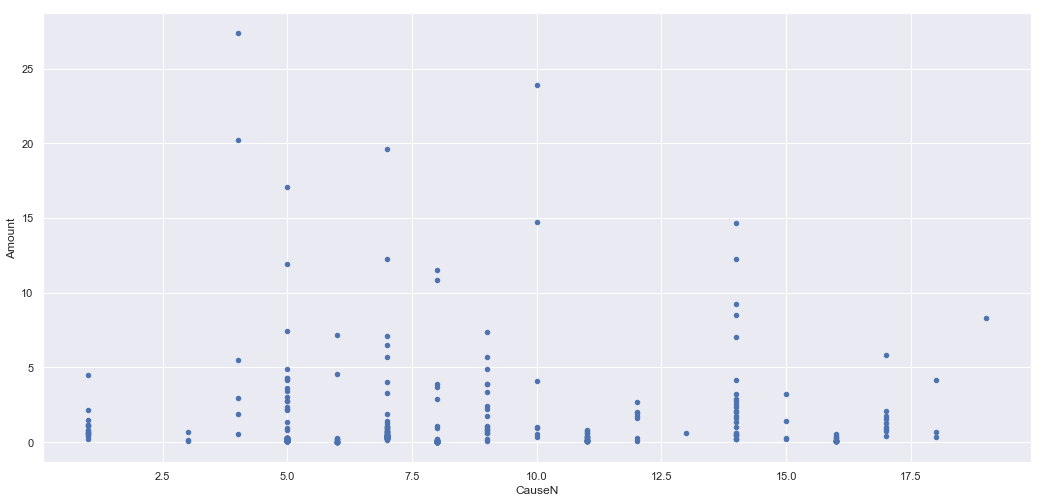

In [24]:
normalized.plot(kind='scatter', x='CauseN', y='Amount')
plt.show()

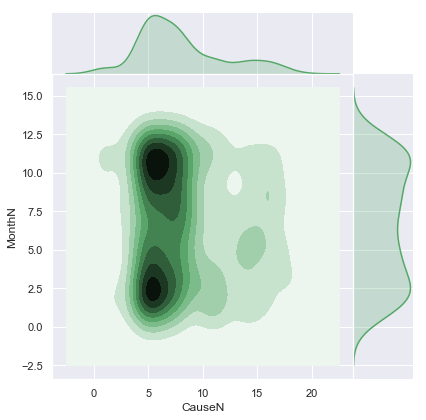

In [25]:
sns.jointplot('CauseN','MonthN',normalized, kind="kde", space=0, color="g")
#sns.jointplot('CauseN','MonthN',normalized, kind="hex", space=0, color="g")

Main causes are between 5 to 12 and the month is distrubuted all over the year, the are two poles around  months 2 and 10

In [26]:
from scipy import stats
for name in normalized:
    print(name, "column entropy :",round(stats.entropy(normalized[name].value_counts(normalize=True), base=2),2))

Project column entropy : 1.71
FY column entropy : 1.82
Quarter column entropy : 1.99
Month column entropy : 3.55
Main Category column entropy : 1.81
Category_details column entropy : 2.8
Main_Causes column entropy : 1.69
Causes_details column entropy : 3.41
Amount column entropy : 6.67
MonthN column entropy : 3.55
CauseN column entropy : 3.27


In [27]:
normalized.to_csv('normalized.csv', index=False)